
# Taller de análisis exploratorio

Nombres:



Para poder realizar cualquier análisis usaremos siempre estas librerias para empezar


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Realizamos la carga de datos.
data = pd.read_csv("titanic3.csv")


In [3]:
# Revisar los tipos de datos.
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [4]:
# Obtención de algunas medidas estadísticas
data.describe()


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
data.sample(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
578,2,0,"Ware, Mr. John James",male,30.0,1,0,CA 31352,21.0000,NaN,S,NaN,NaN,"Bristol, England / New Britain, CT"
561,2,0,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5000,NaN,S,NaN,NaN,"Sault St Marie, ON"
855,3,0,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,NaN,NaN,NaN


In [6]:
data.shape[0], data.shape[1]  #  = data.shape

(1309, 14)

In [7]:
data.shape   # data.shape[0], data.shape[1]

(1309, 14)

In [8]:
# Consulta para saber si existen valores vacíos en todo el dataframe.
data.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [9]:
# las variables categoricas del dataframe.
variables_categoricas= data.select_dtypes(exclude=np.number).columns.to_list()
variables_categoricas

['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest']

In [10]:
# Las variables numéricas del dataframe.
variables_numericas= data.select_dtypes(include=np.number).columns.to_list()
variables_numericas

['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body']

In [11]:
# Filas unicas de una variable en particular, en este caso de pclass""
valores_unicos = data['pclass'].unique()
valores_unicos

array([1, 2, 3])

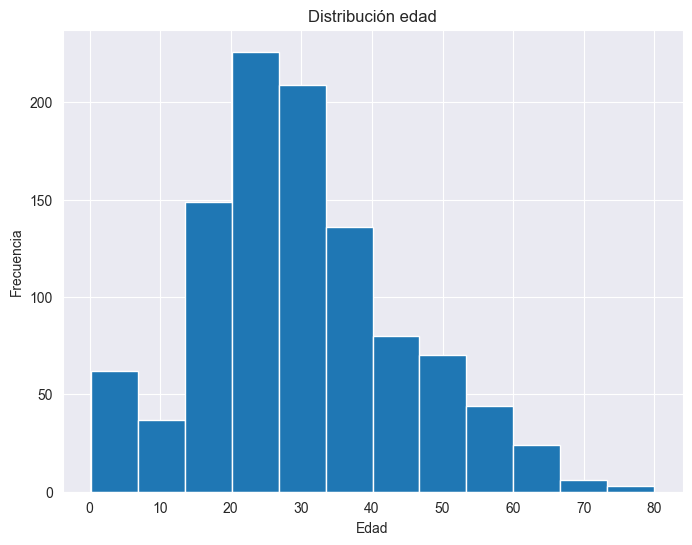

In [12]:
#Gráfico 1 de barras
k = int(np.ceil(1+np.log2(data.shape[0]))) # código de la ley de sturges!!!!
data['age'].hist(bins=k, figsize=(8,6)).set_title("Distribución edad")
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

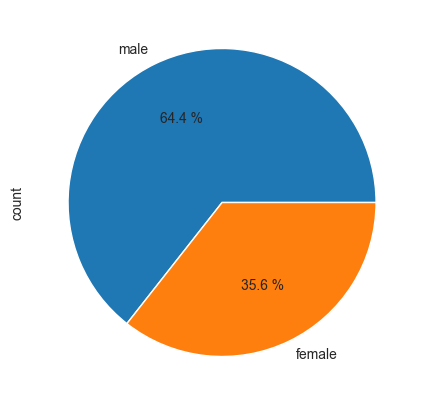

In [13]:
#Gráfico 2 torta
data['sex'].value_counts().plot.pie(figsize=(5,5), autopct="%0.1f %%");

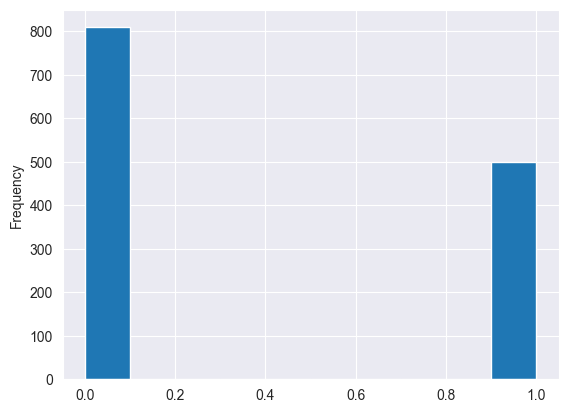

In [14]:
#Gráfico 3 histograma
data['survived'].plot.hist();

In [15]:
#Tablas pivote
superviviente_por_genero= data[['survived', 'sex']].groupby(['sex'], as_index=False).count().sort_values(by='survived', ascending=False)
superviviente_por_genero



,sex,survived
1,male,843
0,female,466


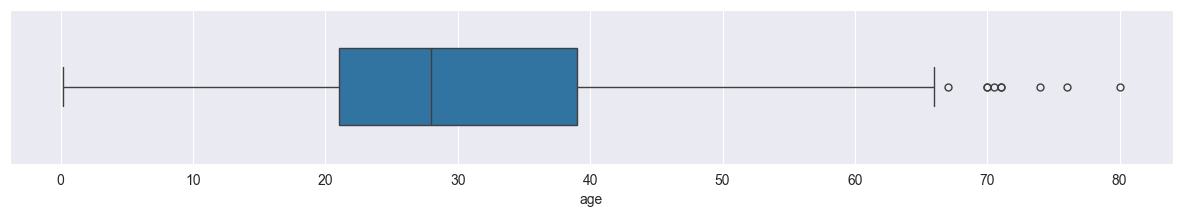

In [16]:
#grafico 4 de box plot para identificación de outliers
plt.figure(figsize=(15,2))
sns.boxplot(x=data['age'], fliersize=5, width=0.5);

<Axes: ylabel='embarked'>

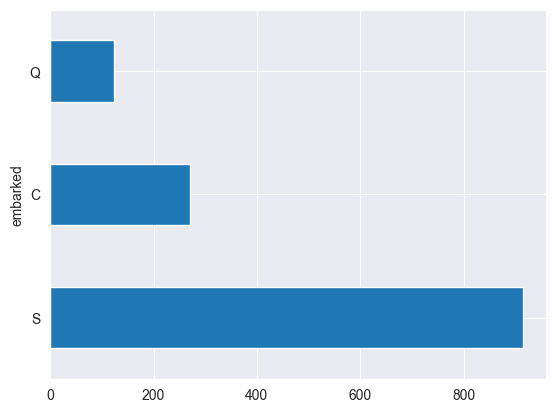

In [17]:
#Grafico 5 de barras horizontales
data['embarked'].value_counts().plot.barh()


# Para finalizar los ejemplos realizaremos una matriz de correlación

In [ ]:
corr = data.corr(method ='pearson')
plt.figure(figsize=(10,10))  # tamaño del gráfico
sns.heatmap(data=corr,square=True, annot=True,cmap='coolwarm');

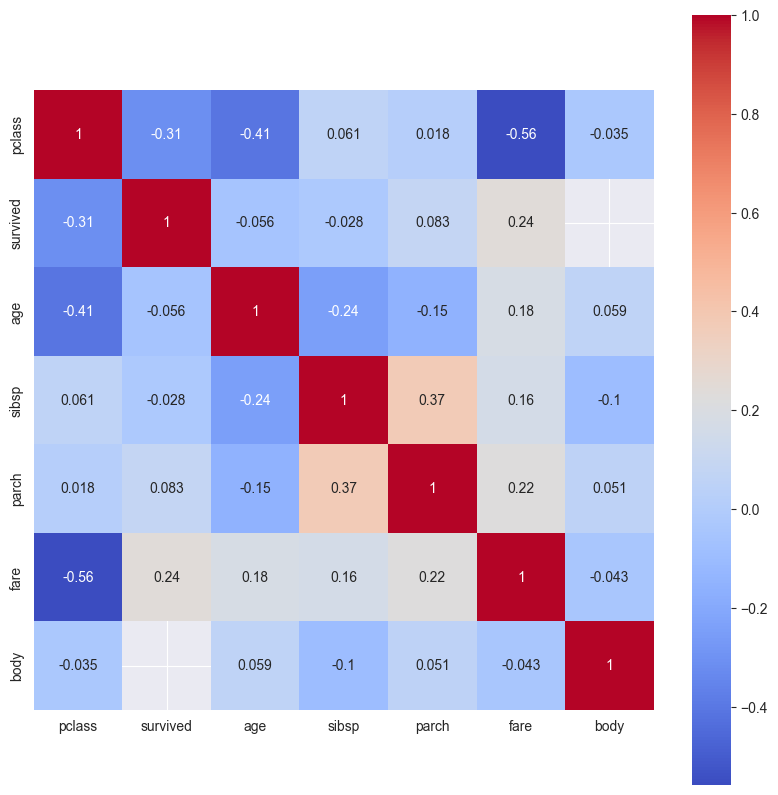

In [22]:
numeric_data = data.select_dtypes(include=np.number)
corr = numeric_data.corr(method='pearson')

plt.figure(figsize=(10,10))
sns.heatmap(data=corr, square=True, annot=True, cmap='coolwarm')
plt.show()

* Deben crear al menos 15 gráficos y 3 tablas que expliquen la data de la mejor manera.

* Cada grafico debe tener observaciones relevantes a su diseño.

* El trabajo debe ser desarrollado y enviado al correo j.guzman@profesor.duoc.cl